##  Imports<a id='2.3_Imports'></a>

In [205]:
# import relevant modules
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Objectives<a id='2.4_Objectives'></a>

To investigate the potential causes of road accidents in the US and find patterns to demonstrate the causes. This database will help to reject/accept the following null hypothesis(problem statements)

Null Hypothesis 1: Environmental factors do not contribute to car accidents significantly.

Null Hypothesis 2: During Covid (2020-2021), there has not been any significant change in the pattern of accidents.

Null Hypothesis 3: Environmental factors and accident hotspots are not sufficient to predict real-time accidents.

## Load File <a id='2.4_Objectives'></a>

In [206]:
# read csv file
df = pd.read_csv(r'C:\Users\Shweta\Documents\gitrepo\Capstonetwo\USaccidentskaggledownload20162021.csv')
# checking the first few rows by calling the head method
df.head(50)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,NaN,I-75 S,R,Dayton,Montgomery,OH,45404,US,US/Eastern,KFFO,2016-02-08 08:18:00,33.8,NaN,100.0,29.63,3.0,SW,2.3,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,NaN,I-71 S,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2016-02-08 11:51:00,33.1,30.0,92.0,29.63,0.5,SW,3.5,0.08,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,2,2016-02-08 14:19:57,2016-02-08 20:19:57,40.702247,-84.075887,40.699110,-84.084293,0.491,At OH-65/Exit 122 - Accident.,NaN,E Hanthorn Rd,R,Lima,Allen,OH,45806,US,US/Eastern,KAOH,2016-02-08 13:53:00,39.0,31.8,70.0,29.59,10.0,WNW,11.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,At I-71/Exit 26 - Accident.,NaN,Outerbelt W,R,Westerville,Franklin,OH,43081,US,US/Eastern,KCMH,2016-02-08 15:12:00,32.0,28.7,100.0,29.59,0.5,West,3.5,0.05,Snow,False,False,False,False,Fal

The above data does not show a lot of missing values. However we can check further as not all columns are displayed above. Lets try again with set_option function after we check the number of columns using info method.

In [207]:
#Call the info method on df to see a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [208]:
# Changing settings in head function to view all columns.
pd.set_option('display.max_columns', 47)
pd.options.display.max_columns = 47
pd.set_option('display.max_columns', None)
df.head(50)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,NaN,I-75 S,R,Dayton,Montgomery,OH,45404,US,US/Eastern,KFFO,2016-02-08 08:18:00,33.8,NaN,100.0,29.63,3.0,SW,2.3,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,NaN,I-71 S,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2016-02-08 11:51:00,33.1,30.0,92.0,29.63,0.5,SW,3.5,0.08,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,2,2016-02-08 14:19:57,2016-02-08 20:19:57,40.702247,-84.075887,40.699110,-84.084293,0.491,At OH-65/Exit 122 - Accident.,NaN,E Hanthorn Rd,R,Lima,Allen,OH,45806,US,US/Eastern,KAOH,2016-02-08 13:53:00,39.0,31.8,70.0,29.59,10.0,WNW,11.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,At I-71/Exit 26 - Accident.,NaN,Outerbelt W,R,Westerville,Franklin,OH,43081,US,US/Eastern,KCMH,2016-02-08 15:12:00,32.0,28.7,100.0,29.59,0.5,West,3.5,0.05,Snow,False,False,False,False,Fal

We can quickly see that start date and end date can be in date time format. Lets check for null values.

## Checking for missing/null values<a id='2.4_Objectives'></a>

In [209]:
# Checking for null values in each column
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

We see that almost 20% of precipitation values are missing. However in certain accidents precipitation information may not be crucial.
There are many missing values in environmental features. Before we address those, let us see if we can reduce/fix the missing values in other columns.

## Replacing null values of Timezone with values using County and State <a id='2.4_Objectives'></a>

In [210]:
# checking time zone
df['Timezone'].unique()

array(['US/Eastern', 'US/Pacific', nan, 'US/Central', 'US/Mountain'],
      dtype=object)

Considering the problem we are trying to solve and the model that we are building, we cannot afford to have incorrect time of an accident.
For instance, an accident accuring in eastern time zone night time may be interpreted as a pacific time zone evening accident.
Hence we can try to populate timezone column with entries based on state or county.

In [211]:
df[df['Timezone'].isnull()].head(50)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1102,A-1103,2,2016-03-25 01:49:51,2016-03-25 07:49:51,37.942090,-122.475470,37.942064,-122.475324,0.008,At Richmond-San Rafael Brg - Accident.,NaN,Richmond-San Rafael Brg,R,Ross Valley,Marin,CA,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1389,A-1390,2,2016-04-01 14:07:09,2016-04-01 20:07:09,37.933100,-122.414470,37.942140,-122.474760,3.344,At Richmond-San Rafael Brg - Accident.,NaN,Richmond-San Rafael Brg,R,West Contra Costa,Contra Costa,CA,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2222,A-2223,2,2016-04-20 15:14:06,2016-04-20 21:14:06,37.933100,-122.414470,37.942140,-122.474760,3.344,At Richmond-San Rafael Brg - Accident. Left la...,NaN,Richmond-San Rafael Brg,R,West Contra Costa,Contra Costa,CA,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2579,A-2580,2,2016-04-26 19:11:45,2016-04-27 01:11:45,37.932770,-122.409590,37.942600,-122.477610,3.768,At Richmond-San Rafael Brg - Accident.,NaN,Richmond-San Rafael Brg,R,West Contra Costa,Contra Costa,CA,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4489,A-4490,4,2016-06-03 20:53:35,2016-06-04 02:53:35,37.934945,-122.442183,37.934077,-122.429174,0.711,Closed at Richmond-San Rafael Brg - Road close...,NaN,Richmond-San Rafael Brg,R,Ross Valley,Marin,CA,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
5205,A-5206,2,2016-06-20 15:23:32,2016-06-20 21:23:32,37.932770,-122.409590,37.942600,-122.477610,3.768,At Richmond-San Rafael Brg - Accident. Left la...,NaN,Richmond-San Rafael Brg,R,West Contra Costa,Contra Costa,CA,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
31740,A-31741,2,2016-12-01 11:21:03,2016-12-01 17:21:03,38.990740,-76.371660,38.983330,-76.340040,1.774,At William Preston Lane Brg - Accident.,NaN,William Preston Lane Jr Memorial Brg,R,District 4 Kent Island,Queen Anne's,MD,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
31902,A-31903,2,2016-12-01 17:08:51,2016-12-01 23:08:51,45.795489,-68.428530,45.636546,-68.501838,11.537,Between Casey Rd/Pond Rd/Exit 259 and ME-157/E...,NaN,I-95 S,R,North Penobscot,Penobscot,ME,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
33076,A-33077,2,2016-12-06 01:10:21,2016-12-06 07:10:21,33.038875,-80.149205,33.038866,-80.149196,0.001,At US-17-ALT/Exit 199 - Accident.,NaN,I-26 W,R,Summerville,Berkeley,SC,29486,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
33143,A-33144,3,2016-12-06 10:53:48,2016-12-06 16:53:48,38.991890,-76.371090,39.008300,-76.403690,2.086,At William Preston Lane Brg - Accident.,NaN,William Preston Lane Jr Memorial Brg,R,District 4 Kent Island,Queen Anne's,MD,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Clearly a few timezone entries can be filled using State column. Lets check null values of Timezone for every state.

In [212]:
df.loc[df['Timezone'].isna(), 'State'].value_counts()

OR    1371
SC     794
FL     462
CA     399
UT     273
MD     212
AZ      37
MN      20
WA      13
TX      12
NV      12
ME       8
LA       8
AR       7
MO       5
WI       4
VA       4
MS       3
NH       3
NY       2
NC       2
OH       2
NJ       2
IL       2
CO       1
AL       1
Name: State, dtype: int64

SC is EST, OR could be PST or Mountain Time zone based on the county, FL could be EST or Central time zone based on the county, CA is completely PST, UT is completely Mountain time zone, MD is completely EST, AZ is completely mountain time zone, MN is completely Central time zone, WA is completely Pacific, Cannot be sure of TX, NV is completely Pacific.This covers the top eleven and we can fill most of the null values in Timezone.

In [213]:
# Replacing all null values in Timezone where State = CA, State =SC, State = UT, State = MD, State = AZ, State = MN, State = WA, State= NV with 'US/Pacific', 'US/Eastern', 'US/Mountain', 'US/Eastern', 'US/Mountain', 'US/Central', 'US/Pacific', 'US/Pacific' respectively  using mask function.
df['Timezone'].mask((df['State'] == 'CA') & df['Timezone'].isna(), 'US/Pacific', inplace=True)
df['Timezone'].mask((df['State'] == 'SC') & df['Timezone'].isna(), 'US/Eastern', inplace=True)
df['Timezone'].mask((df['State'] == 'UT') & df['Timezone'].isna(), 'US/Mountain', inplace=True)
df['Timezone'].mask((df['State'] == 'MD') & df['Timezone'].isna(), 'US/Eastern', inplace=True)
df['Timezone'].mask((df['State'] == 'AZ') & df['Timezone'].isna(), 'US/Mountain', inplace=True)
df['Timezone'].mask((df['State'] == 'MN') & df['Timezone'].isna(), 'US/Central', inplace=True)
df['Timezone'].mask((df['State'] == 'WA') & df['Timezone'].isna(), 'US/Pacific', inplace=True)
df['Timezone'].mask((df['State'] == 'NV') & df['Timezone'].isna(), 'US/Pacific', inplace=True)

In [214]:
#checking if the replacment is successful
df.loc[df['Timezone'].isna(), 'State'].value_counts()

OR    1371
FL     462
TX      12
ME       8
LA       8
AR       7
MO       5
VA       4
WI       4
NH       3
MS       3
IL       2
NY       2
NC       2
OH       2
NJ       2
CO       1
AL       1
Name: State, dtype: int64

Most counties in Oregon are in pacific time zone except for the northern part of Malheur County. Similarly almost all of Florida is in Eastern timezone except for nine counties that fall in Central Timezone as follows.
Escambia County
Santa Rosa County
Okaloosa County
Walton County
Holmes County
Washington County
Bay County
Jackson County (borders Eastern Time)
Calhoun County (borders Eastern Time)
Gulf County (borders Eastern Time) and is also split with 2 timezones. The northers side of Gulf County is in the Central Time Zone and the south along the Gulf Coast is in the Eastern Time Zone.

In [215]:
# Lets check Timezones for each county of OR and FL.
# Query the database for State = OR and timezone is null

df1=df.query("State == 'OR' & Timezone.isna()")
 
# List the counties which have no timezone 
df1['County'].unique()

array(['Coos', 'Deschutes', 'Linn', 'Clackamas'], dtype=object)

Since Malheur county is not amongst those that have null times, it is safe to replace the null values of Timezone in df (original dataframe) for Oregon State with 'US/Pacific'

In [216]:
df['Timezone'].mask((df['State'] == 'OR') & (df['County'] == 'Coos') & df['Timezone'].isna(), 'US/Pacific', inplace=True)
df['Timezone'].mask((df['State'] == 'OR') & (df['County'] == 'Deschutes') & df['Timezone'].isna(), 'US/Pacific', inplace=True)
df['Timezone'].mask((df['State'] == 'OR') & (df['County'] == 'Linn') & df['Timezone'].isna(), 'US/Pacific', inplace=True)
df['Timezone'].mask((df['State'] == 'OR') & (df['County'] == 'Clackamas') & df['Timezone'].isna(), 'US/Pacific', inplace=True)

In [217]:
# Query the database for State = FL and timezone is null
df2=df.query("State == 'FL' & Timezone.isna()")
 
# List the counties which have no timezone 
df2['County'].unique()


array(['Pinellas', 'Broward', 'Santa Rosa', 'Brevard', 'Lee', 'Monroe',
       'Bay', 'Palm Beach'], dtype=object)

Santa Rosa and Bay counties are in Central Timezone, and the rest are in Eastern. So we can replace Timezone null values accordingly.

In [218]:
df['Timezone'].mask((df['State'] == 'FL') & (df['County'] == 'Santa Rosa') & df['Timezone'].isna(), 'US/Central', inplace=True)
df['Timezone'].mask((df['State'] == 'FL') & (df['County'] == 'Bay') & df['Timezone'].isna(), 'US/Central', inplace=True)
df['Timezone'].mask((df['State'] == 'FL') & (df['County'] == 'Pinellas') & df['Timezone'].isna(), 'US/Eastern', inplace=True)
df['Timezone'].mask((df['State'] == 'FL') & (df['County'] == 'Broward') & df['Timezone'].isna(), 'US/Eastern', inplace=True)
df['Timezone'].mask((df['State'] == 'FL') & (df['County'] == 'Lee') & df['Timezone'].isna(), 'US/Eastern', inplace=True)
df['Timezone'].mask((df['State'] == 'FL') & (df['County'] == 'Monroe') & df['Timezone'].isna(), 'US/Eastern', inplace=True)
df['Timezone'].mask((df['State'] == 'FL') & (df['County'] == 'Brevard') & df['Timezone'].isna(), 'US/Eastern', inplace=True)
df['Timezone'].mask((df['State'] == 'FL') & (df['County'] == 'Palm Beach') & df['Timezone'].isna(), 'US/Eastern', inplace=True)


We do the same for Texas

In [219]:
# Query the database for State = FL and timezone is null
df3=df.query("State == 'TX' & Timezone.isna()")
 
# List the counties which have no timezone 
df3['County'].unique()

array(['Collin', 'Denton'], dtype=object)

These two counties are in Central time zone in Texas. 

In [220]:
df['Timezone'].mask((df['State'] == 'TX') & (df['County'] == 'Collin') & df['Timezone'].isna(), 'US/Central', inplace=True)
df['Timezone'].mask((df['State'] == 'TX') & (df['County'] == 'Denton') & df['Timezone'].isna(), 'US/Central', inplace=True)

Now lets check the null values in Timezone again

In [221]:
df.loc[df['Timezone'].isna(), 'State'].value_counts()

ME    8
LA    8
AR    7
MO    5
VA    4
WI    4
MS    3
NH    3
NJ    2
OH    2
NC    2
NY    2
IL    2
CO    1
AL    1
Name: State, dtype: int64

ME, VA, NH, NJ, OH, NC & NY are completely in Eastern.

LA, AR, MO, WI, MS, IL & AL are completely in Central.

CO is in Mountain, so accordingly we perform the earlier function

In [222]:
df['Timezone'].mask((df['State'] == 'ME') & df['Timezone'].isna(), 'US/Eastern', inplace=True)
df['Timezone'].mask((df['State'] == 'VA') & df['Timezone'].isna(), 'US/Eastern', inplace=True)
df['Timezone'].mask((df['State'] == 'NH') & df['Timezone'].isna(), 'US/Eastern', inplace=True)
df['Timezone'].mask((df['State'] == 'NJ') & df['Timezone'].isna(), 'US/Eastern', inplace=True)
df['Timezone'].mask((df['State'] == 'OH') & df['Timezone'].isna(), 'US/Eastern', inplace=True)
df['Timezone'].mask((df['State'] == 'NC') & df['Timezone'].isna(), 'US/Eastern', inplace=True)
df['Timezone'].mask((df['State'] == 'NY') & df['Timezone'].isna(), 'US/Eastern', inplace=True)
df['Timezone'].mask((df['State'] == 'LA') & df['Timezone'].isna(), 'US/Central', inplace=True)
df['Timezone'].mask((df['State'] == 'AR') & df['Timezone'].isna(), 'US/Central', inplace=True)
df['Timezone'].mask((df['State'] == 'MO') & df['Timezone'].isna(), 'US/Central', inplace=True)
df['Timezone'].mask((df['State'] == 'WI') & df['Timezone'].isna(), 'US/Central', inplace=True)
df['Timezone'].mask((df['State'] == 'MS') & df['Timezone'].isna(), 'US/Central', inplace=True)
df['Timezone'].mask((df['State'] == 'IL') & df['Timezone'].isna(), 'US/Central', inplace=True)
df['Timezone'].mask((df['State'] == 'AL') & df['Timezone'].isna(), 'US/Central', inplace=True)
df['Timezone'].mask((df['State'] == 'CO') & df['Timezone'].isna(), 'US/Mountain', inplace=True)

In [223]:
df.loc[df['Timezone'].isna(), 'State'].value_counts()

Series([], Name: State, dtype: int64)

In [224]:
# Since Timezone has no more null values lets check other columns.
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                       0
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

We have a total of 1319 zipcodes missing, and just 137 cities missing. So we can ignore one of these columns totally. Same goes for Aiport codes. We can use City column which has fewer missing values and delete the remaining two columns of airport code and zipcode.

However it is to be noted that when we are taking of environmental features, it may vary within city but rarely within the same zipcode. A zipcode comprises of smaller area and than an airport code or city. So for environmental features it is good to consider zipcodes.

## Replacing null values of Zipcodes with values using Start_lat and Start_Lng<a id='2.4_Objectives'></a>

In [225]:
#Lets try to get the zipcodes using the start_lat and start_lng . reference:https://gis.stackexchange.com/questions/352961/converting-lat-lon-to-postal-code-using-python


import geopy
import pandas as pd


def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']['postcode']


geolocator = geopy.Nominatim(user_agent='my-application')

for i in range(0, len(df)):
    if pd.isnull(df['Zipcode'].iloc[i]) == True:
    Zipcodes = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Start_Lat', lon_field='Start_Lng')

practice
import geopy
import pandas as pd


def get_zipcode(df9, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df9[lat_field], df9[lon_field]))
    return location.raw['address']['postcode']


geolocator = geopy.Nominatim(user_agent='my-application')

df9 = pd.DataFrame({
    'Lat': [29.39291, 29.39923, 29.40147, 29.38752, 29.39291, 29.39537, 29.39343, 29.39291, 29.39556],
    'Lon': [-98.50925, -98.51256, -98.51123, -98.52372, -98.50925, -98.50402, -98.49707, -98.50925, -98.53148]
})
zipcodes = df9.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Lat', lon_field='Lon')

## Checking for Outliers <a id='2.4_Objectives'></a>

array([[<AxesSubplot:title={'center':'Severity'}>,
        <AxesSubplot:title={'center':'Start_Lat'}>,
        <AxesSubplot:title={'center':'Start_Lng'}>,
        <AxesSubplot:title={'center':'End_Lat'}>],
       [<AxesSubplot:title={'center':'End_Lng'}>,
        <AxesSubplot:title={'center':'Distance(mi)'}>,
        <AxesSubplot:title={'center':'Number'}>,
        <AxesSubplot:title={'center':'Temperature(F)'}>],
       [<AxesSubplot:title={'center':'Wind_Chill(F)'}>,
        <AxesSubplot:title={'center':'Humidity(%)'}>,
        <AxesSubplot:title={'center':'Pressure(in)'}>,
        <AxesSubplot:title={'center':'Visibility(mi)'}>],
       [<AxesSubplot:title={'center':'Wind_Speed(mph)'}>,
        <AxesSubplot:title={'center':'Precipitation(in)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

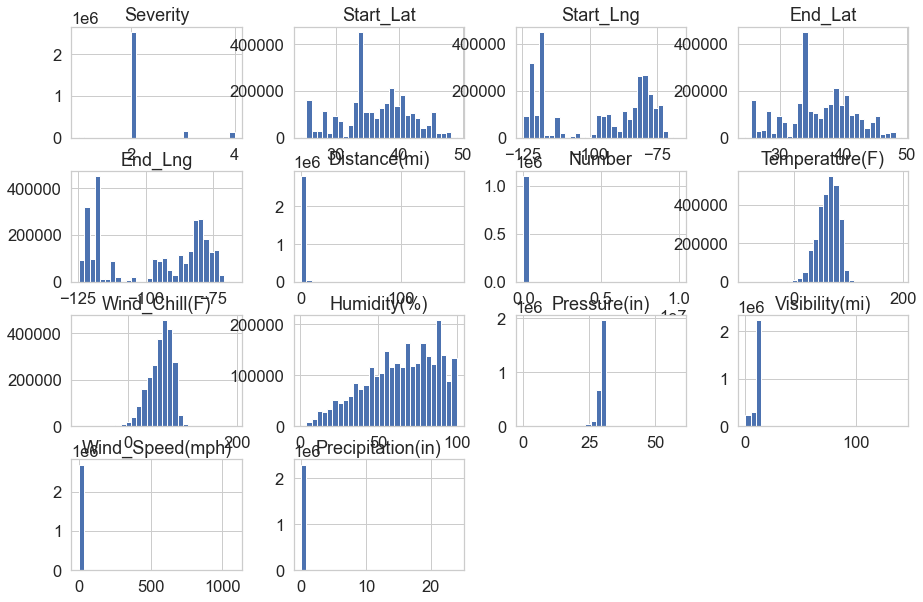

In [226]:
# Checking for outliers using histogram
df.hist(bins=30, figsize=(15, 10))

We cannot see many outliers. However we can readjust the number of bins for variables- Temperature(F), Wind_Chill(F), and Humidity as their plot look too crowded.
We also notice that most accidents are categorised under Severity-2

<AxesSubplot:>

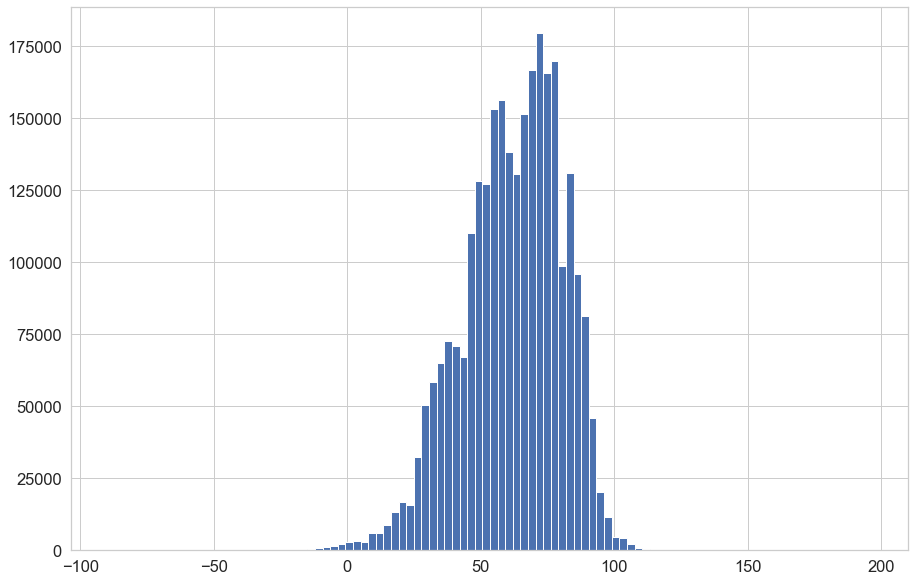

In [227]:
df['Temperature(F)'].hist(bins=100, figsize=(15, 10))

<AxesSubplot:>

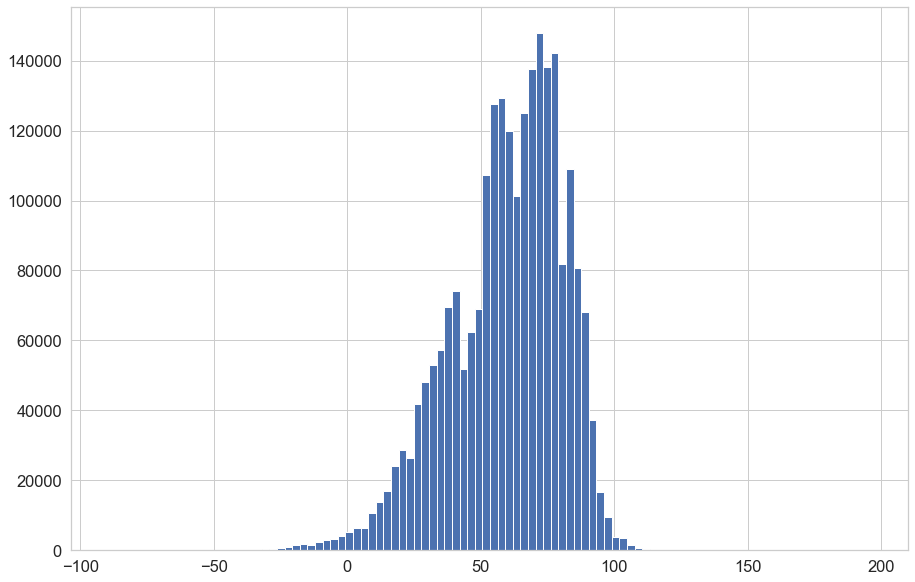

In [228]:
df['Wind_Chill(F)'].hist(bins=100, figsize=(15, 10))

<AxesSubplot:>

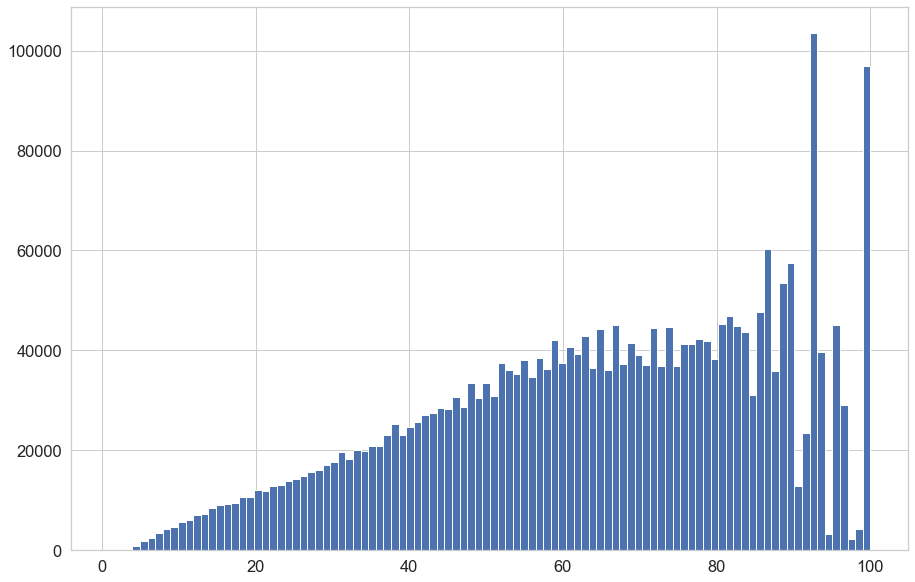

In [229]:
df['Humidity(%)'].hist(bins=100, figsize=(15, 10))

For now, since the histograms are not showing any outliers, we can check using boxplots.

In [230]:
# Setting parameters for sns to get a bigger plot
sns.set(rc={'figure.figsize':(8,5)}, font_scale=1.5, style='whitegrid')

<AxesSubplot:xlabel='Temperature(F)'>

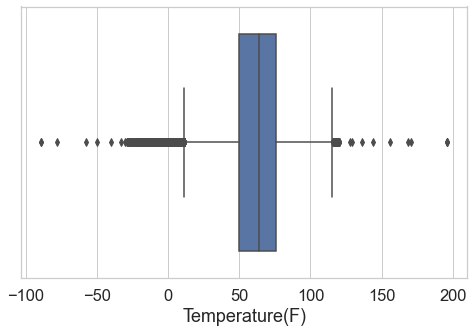

In [231]:
sns.boxplot(x=df["Temperature(F)"])

<AxesSubplot:xlabel='Wind_Chill(F)'>

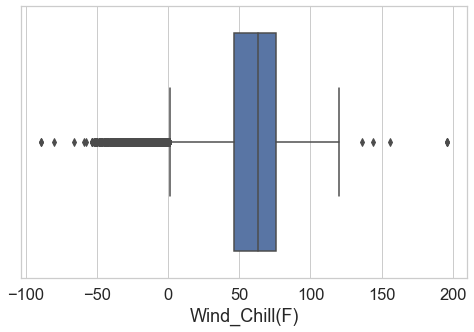

In [232]:
sns.boxplot(x=df["Wind_Chill(F)"])

<AxesSubplot:xlabel='Humidity(%)'>

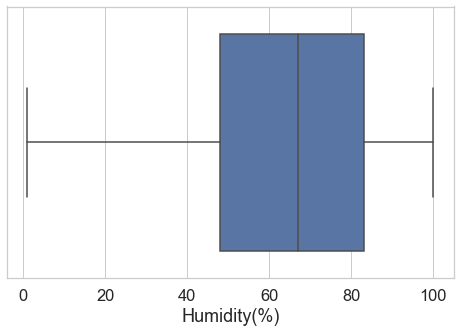

In [233]:
sns.boxplot(x=df["Humidity(%)"])

Clearly there are outliers in Temperature(F) and Wind_Chill(F) column. We can either delete these rows or replace them with a mean/median. 

In [234]:
# Filtering out the rows with Temperature more than 125
temp_out=df[df['Temperature(F)']>125]
print(len(temp_out))
temp_out

10


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
17518,A-17519,3,2016-10-21 16:19:04,2016-10-21 22:19:04,30.540850,-97.692180,30.577870,-97.692730,2.558,Between RM-1431/Chandler Rd/Exit 256 and Westi...,NaN,I-35 N,R,Round Rock,Williamson,TX,78664,US,US/Central,KEDC,2016-10-21 16:15:00,127.4,NaN,63.0,30.18,9.0,NNE,5.8,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
24105,A-24106,2,2016-10-19 11:23:50,2016-10-19 17:23:50,30.441200,-97.666150,30.441220,-97.665830,0.019,At FM-1825 - Accident.,NaN,W Wells Branch Pkwy,R,Pflugerville,Travis,TX,78660,US,US/Central,KEDC,2016-10-19 11:15:00,129.2,NaN,95.0,30.00,10.0,SSW,10.4,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
267217,A-267218,2,2021-04-22 11:42:00,2021-04-22 14:02:30,28.505140,-82.522106,28.504019,-82.522836,0.089,Incident on MARINER BLVD near MAYBERRY RD Expe...,5255.0,Mariner Blvd,R,Spring Hill,Hernando,FL,34609-1600,US,US/Eastern,KBKV,2021-04-22 11:52:00,156.0,156.0,31.0,30.07,10.0,NE,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
496322,A-496323,2,2021-08-12 13:03:26,2021-08-12 13:59:22,33.167468,-87.531087,33.167986,-87.523992,0.412,Stationary traffic on US-11 N - AL-7 from AL-2...,451.0,Skyland Blvd E,R,Tuscaloosa,Tuscaloosa,AL,35405-4032,US,US/Central,KTCL,2021-08-12 14:45:00,196.0,196.0,49.0,29.93,10.0,ENE,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
632650,A-632651,2,2021-04-22 09:12:00,2021-04-22 13:12:30,28.364485,-82.684577,28.365733,-82.684796,0.087,Incident on ULYSSES DR near SESAME ST Expect d...,7502.0,Sesame St,R,Hudson,Pasco,FL,34667-1276,US,US/Eastern,KBKV,2021-04-22 09:20:00,136.0,136.0,46.0,30.06,10.0,NE,12.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
867812,A-867813,2,2021-08-12 13:03:26,2021-08-12 13:57:48,33.167696,-87.528356,33.169198,-87.525124,0.214,Stationary traffic on US-11 N - US-82 W - AL-6...,633.0,Skyland Blvd E,R,Tuscaloosa,Tuscaloosa,AL,35405-4036,US,US/Central,KTCL,2021-08-12 14:45:00,196.0,196.0,49.0,29.93,10.0,ENE,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1058963,A-1058964,2,2021-09-09 08:19:23,2021-09-09 09:35:14,42.704962,-73.853545,42.703024,-73.850154,0.218,Incident on I-90 EB near I-90 Drive with caution.,NaN,I-90 E,R,Albany,Albany,NY,12205,US,US/Eastern,KALB,2021-09-09 08:41:00,144.0,144.0,100.0,29.49,10.0,CALM,0.0,0.0,Patches of Fog,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1108162,A-1108163,2,2021-08-12 13:03:26,2021-08-12 14:01:42,33.167468,-87.531087,33.167883,-87.525514,0.324,Stationary traffic on US-11 N - AL-7 from AL-2...,451.0,Skyland Blvd E,R,Tuscaloosa,Tuscaloosa,AL,35405-4032,US,US/Central,KTCL,2021-08-12 14:45:00,196.0,196.0,49.0,29.93,10.0,ENE,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
2509205,A-2509206,2,2019-03-26 20:00:27,2019-03-26 20:29:12,33.282800,-111.796740,33.282910,-111.783790,0.748,At Gilbert Rd/Exit 44 - Accident. Lane blocked.,NaN,Santan Fwy E,R,Chandler,Maricopa,AZ,85286,US,US/Mountain,KCHD,2019-03-26 19:47:00,170.6,NaN,4.0,29.88,10.0,WNW,6.9,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2626381,A-2626382,2,2

The highest temperature on record belongs to California's Death Valley which, in 1913, reached a temperature of 134 degrees Fahrenheit.
Further on checking weather data for TX, FL, AL, AZ, NY and IL, none of these locations have ever recorded anything over 120F. TX has recoded a max of 120F.

In [235]:
temp_out=df[df['Temperature(F)']>120]
print(len(temp_out))
temp_out

10


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
17518,A-17519,3,2016-10-21 16:19:04,2016-10-21 22:19:04,30.540850,-97.692180,30.577870,-97.692730,2.558,Between RM-1431/Chandler Rd/Exit 256 and Westi...,NaN,I-35 N,R,Round Rock,Williamson,TX,78664,US,US/Central,KEDC,2016-10-21 16:15:00,127.4,NaN,63.0,30.18,9.0,NNE,5.8,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
24105,A-24106,2,2016-10-19 11:23:50,2016-10-19 17:23:50,30.441200,-97.666150,30.441220,-97.665830,0.019,At FM-1825 - Accident.,NaN,W Wells Branch Pkwy,R,Pflugerville,Travis,TX,78660,US,US/Central,KEDC,2016-10-19 11:15:00,129.2,NaN,95.0,30.00,10.0,SSW,10.4,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
267217,A-267218,2,2021-04-22 11:42:00,2021-04-22 14:02:30,28.505140,-82.522106,28.504019,-82.522836,0.089,Incident on MARINER BLVD near MAYBERRY RD Expe...,5255.0,Mariner Blvd,R,Spring Hill,Hernando,FL,34609-1600,US,US/Eastern,KBKV,2021-04-22 11:52:00,156.0,156.0,31.0,30.07,10.0,NE,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
496322,A-496323,2,2021-08-12 13:03:26,2021-08-12 13:59:22,33.167468,-87.531087,33.167986,-87.523992,0.412,Stationary traffic on US-11 N - AL-7 from AL-2...,451.0,Skyland Blvd E,R,Tuscaloosa,Tuscaloosa,AL,35405-4032,US,US/Central,KTCL,2021-08-12 14:45:00,196.0,196.0,49.0,29.93,10.0,ENE,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
632650,A-632651,2,2021-04-22 09:12:00,2021-04-22 13:12:30,28.364485,-82.684577,28.365733,-82.684796,0.087,Incident on ULYSSES DR near SESAME ST Expect d...,7502.0,Sesame St,R,Hudson,Pasco,FL,34667-1276,US,US/Eastern,KBKV,2021-04-22 09:20:00,136.0,136.0,46.0,30.06,10.0,NE,12.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
867812,A-867813,2,2021-08-12 13:03:26,2021-08-12 13:57:48,33.167696,-87.528356,33.169198,-87.525124,0.214,Stationary traffic on US-11 N - US-82 W - AL-6...,633.0,Skyland Blvd E,R,Tuscaloosa,Tuscaloosa,AL,35405-4036,US,US/Central,KTCL,2021-08-12 14:45:00,196.0,196.0,49.0,29.93,10.0,ENE,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1058963,A-1058964,2,2021-09-09 08:19:23,2021-09-09 09:35:14,42.704962,-73.853545,42.703024,-73.850154,0.218,Incident on I-90 EB near I-90 Drive with caution.,NaN,I-90 E,R,Albany,Albany,NY,12205,US,US/Eastern,KALB,2021-09-09 08:41:00,144.0,144.0,100.0,29.49,10.0,CALM,0.0,0.0,Patches of Fog,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1108162,A-1108163,2,2021-08-12 13:03:26,2021-08-12 14:01:42,33.167468,-87.531087,33.167883,-87.525514,0.324,Stationary traffic on US-11 N - AL-7 from AL-2...,451.0,Skyland Blvd E,R,Tuscaloosa,Tuscaloosa,AL,35405-4032,US,US/Central,KTCL,2021-08-12 14:45:00,196.0,196.0,49.0,29.93,10.0,ENE,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
2509205,A-2509206,2,2019-03-26 20:00:27,2019-03-26 20:29:12,33.282800,-111.796740,33.282910,-111.783790,0.748,At Gilbert Rd/Exit 44 - Accident. Lane blocked.,NaN,Santan Fwy E,R,Chandler,Maricopa,AZ,85286,US,US/Mountain,KCHD,2019-03-26 19:47:00,170.6,NaN,4.0,29.88,10.0,WNW,6.9,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2626381,A-2626382,2,2

In [236]:
temp_out=df[df['Temperature(F)']==120]
print(len(temp_out))
temp_out

8


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1515728,A-1515729,2,2021-01-08 02:21:00,2021-01-08 03:48:56,34.076961,-117.200485,34.081541,-117.200515,0.316,Incident on I-210 WB near SAN BERNARDINO AVE R...,NaN,CA-210 W,R,Redlands,San Bernardino,CA,92374,US,US/Pacific,KSBD,2021-01-08 07:00:00,120.0,120.0,NaN,28.89,7.0,CALM,0.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1551546,A-1551547,2,2021-01-08 02:48:00.000000000,2021-01-08 06:34:00.000000000,34.158997,-117.260749,34.160604,-117.260452,0.112,Incident on MODESTO DR near HOUSE 3842 Drive w...,3747.0,Modesto Dr,R,San Bernardino,San Bernardino,CA,92404-1933,US,US/Pacific,KSBD,2021-01-08 07:00:00,120.0,120.0,NaN,28.89,7.0,CALM,0.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1552667,A-1552668,2,2021-01-08 02:23:00,2021-01-08 04:33:22,34.061790,-117.182461,34.061960,-117.183271,0.048,WB 10 JWO 6TH. BOTH ON RS,NaN,Orange St,R,Redlands,San Bernardino,CA,92374,US,US/Pacific,KSBD,2021-01-08 07:00:00,120.0,120.0,NaN,28.89,7.0,CALM,0.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1618641,A-1618642,2,2021-01-08 02:48:00,2021-01-08 06:34:00,34.158997,-117.260749,34.160604,-117.260452,0.112,Incident on MODESTO DR near HOUSE 3842 Drive w...,3747.0,Modesto Dr,R,San Bernardino,San Bernardino,CA,92404-1933,US,US/Pacific,KSBD,2021-01-08 07:00:00,120.0,120.0,NaN,28.89,7.0,CALM,0.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1624635,A-1624636,2,2021-01-08 01:21:30,2021-01-08 01:40:00,34.278475,-117.451457,34.299027,-117.457492,1.461,Slow traffic on I-15 N - Barstow Fwy N from Ke...,NaN,Barstow Fwy N,R,San Bernardino,San Bernardino,CA,92407,US,US/Pacific,KSBD,2021-01-08 07:00:00,120.0,120.0,NaN,28.89,7.0,CALM,0.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1627780,A-1627781,2,2021-01-08 02:01:00,2021-01-08 04:33:22,34.184849,-117.180957,34.184318,-117.181783,0.060,SR330 CITY CREEK RANGER STATION. RP ADV THEY A...,6870.0,City Creek Rd,R,San Bernardino,San Bernardino,CA,92407,US,US/Pacific,KSBD,2021-01-08 07:00:00,120.0,120.0,NaN,28.89,7.0,CALM,0.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1632102,A-1632103,2,2021-01-08 03:36:00,2021-01-08 05:52:20,34.146753,-117.260750,34.146758,-117.261135,0.022,1039 SBPD FOR BL,1211.0,E Lynwood Dr,R,San Bernardino,San Bernardino,CA,92404-2752,US,US/Pacific,KSBD,2021-01-08 07:00:00,120.0,120.0,NaN,28.89,7.0,CALM,0.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1647654,A-1647655,2,2021-01-08 01:50:00.000000000,2021-01-08 04:42:43.000000000,34.146205,-117.300800,34.145845,-117.305700,0.281,B75-202T V8148850 VEH 20 SM 88099 ID 22583 [Sh...,2983.0,N H St,R,San Bernardino,San Bernardino,CA,92405-2801,US,US/Pacific,KSBD,2021-01-08 07:00:00,120.0,120.0,NaN,28.89,7.0,CALM,0.0,0.0,Partly Cloudy,False,False,True,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night


CA can record temperatures in 120F range. Hence we will delete all those that exceed a temperature of 120.

In [237]:
df=df[df['Temperature(F)'] <= 120.0]

In [238]:
df.shape

(2776058, 47)

In [239]:
#analysing the lowest temperatures.
temp_out2=df[df['Temperature(F)']<10]
print(len(temp_out2))
temp_out2

19233


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
83,A-84,2,2016-02-11 06:26:40,2016-02-11 12:26:40,39.747290,-84.214260,39.748760,-84.201460,0.688,At I-75 - Accident.,534.0,S Broadway St,L,Dayton,Montgomery,OH,45417-3466,US,US/Eastern,KDAY,2016-02-11 05:56:00,7.0,-5.7,87.0,30.22,10.0,West,8.1,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
94,A-95,2,2016-02-11 07:47:57,2016-02-11 13:47:57,40.056420,-83.030970,40.054560,-83.031660,0.134,At Henderson Rd - Accident.,NaN,Olentangy Fwy S,R,Columbus,Franklin,OH,43214,US,US/Eastern,KOSU,2016-02-11 07:53:00,9.0,-3.2,84.0,30.24,10.0,West,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
97,A-98,2,2016-02-11 08:28:42,2016-02-11 14:28:42,39.755130,-84.166140,39.754240,-84.155980,0.543,At Steve Whalen Blvd - Accident.,NaN,US-35 E,R,Dayton,Montgomery,OH,45410,US,US/Eastern,KFFO,2016-02-11 08:58:00,9.1,-0.7,83.0,30.30,10.0,South,5.8,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
134,A-135,2,2016-02-11 20:09:17,2016-02-12 02:09:17,41.063400,-81.490790,41.063400,-81.490790,0.000,At Arlington St - Accident. in the left lane.,NaN,S Arlington St,R,Akron,Summit,OH,44306,US,US/Eastern,KAKR,2016-02-11 19:54:00,9.0,2.4,73.0,30.31,10.0,SSW,3.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
148,A-149,3,2016-02-13 07:14:41,2016-02-13 13:14:41,40.484222,-80.137554,40.503456,-80.139196,1.332,At Coraopolis Rd - Accident.,5.0,Forest Grove Rd,L,Coraopolis,Allegheny,PA,15108-3485,US,US/Eastern,KPIT,2016-02-13 06:51:00,6.1,-12.2,63.0,30.32,10.0,WNW,16.1,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724833,A-2724834,2,2017-12-30 11:22:00,2017-12-30 17:22:00,45.646670,-110.889350,45.646190,-110.880440,0.432,At Trail Crk Road/Exit 316 - Accident. Lane bl...,NaN,US-191 S,R,Bozeman,Gallatin,MT,59715,US,US/Mountain,KBZN,2017-12-30 10:56:00,-0.9,-12.7,79.0,30.28,10.0,WNW,5.8,NaN,Mostly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2724835,A-2724836,3,2017-12-30 14:51:15,2017-12-30 20:51:15,45.655734,-109.271497,45.630719,-108.928635,16.652,Between Springtime Road/Exit 400 and Old US-10...,NaN,I-90 E,R,Columbus,Stillwater,MT,59019,US,US/Mountain,KBIL,2017-12-30 14:53:00,-6.0,-22.6,79.0,30.40,10.0,NE,9.2,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2728354,A-2728355,3,2017-11-09 22:54:53,2017-11-10 04:54:53,45.506810,-92.993120,45.581440,-92.992670,5.156,Between MN-95/Exit 147 and CR-10/Exit 152 - Ac...,NaN,I-35 N,R,North Branch,Chisago,MN,55056,US,US/Central,KROS,2017-11-09 22:54:00,6.4,-0.5,77.0,30.57,10.0,NNE,3.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2771896,A-2771897,2,2019-04-03 13:21:38,2019-04-03 13:49:20,33.804596,-79.009636,33.802616,-79.007852,0.171,At Edward E Burroughs Hwy - Accident. Left lan...,1658.0,E Highway 501,L,Conway,Horry,SC,29526-9534,US,US/Eastern,KHYW,2019-04-03 13:15:00,-17.0,-17.0,NaN,30.34,7.0,CALM,0.0,0.0,Fair,False,False,Fa

Grouping the min temperature in each state can help analyse outliers

In [240]:
temp_out2.groupby(['State'])['Temperature(F)'].min()


State
AL     1.0
AR    -6.0
AZ    -0.0
CA   -17.0
CO   -89.0
CT    -0.0
DE     8.1
FL   -58.0
IA   -25.1
ID    -9.9
IL   -22.4
IN   -20.2
KS   -13.0
KY    -0.0
LA     3.0
MA   -13.0
MD     1.0
ME   -13.0
MI   -15.0
MN   -33.0
MO   -11.0
MS     1.0
MT   -30.0
NC     1.0
ND   -28.0
NE   -28.0
NH   -14.1
NJ     1.0
NM    -4.0
NV     8.0
NY   -77.8
OH   -14.8
OK     2.0
OR    -7.0
PA    -4.0
RI    -2.0
SC   -22.0
SD    -5.0
TN    -0.0
TX   -40.0
UT    -1.0
VA   -18.0
VT    -3.5
WA    -0.0
WI   -23.1
WV    -2.0
WY    -9.9
Name: Temperature(F), dtype: float64

The lowest temperature ever recorded in the U.S. was negative 80 degrees in Prospect Creek, Alaska, north of Fairbanks, on Jan. 23, 1971. Outside Alaska, Montana holds the record for the all-time coldest temperature at negative 70 degrees.
The coldest air temperature ever recorded in the state of Colorado was in Maybell on February 1, 1985 when the thermometer dropped to -61 degrees. So -89 is clearly an error.
The lowest temperature ever recorded in Florida (-2°F) occurred on February 13, 1899 and lowest temperature recorded in TX is -23F. On January 21, 1985, Caesars Head, SC plunged to an impossibly frigid –19 degrees which was its lowest recorded temperature till date.
The record low for New York state is −52 °F (−47 °C), set at Stillwater Reservoir on February 9, 1934 and at Old Forge on February 18, 1979.

So clearly, CO, TX, FL, NY and SC have not recorded such outliers. And these can be deleted. We can also evaluate more rows with low temperatures from these states.

In [241]:
temp_out2[((temp_out2['State'] == 'CO') & (temp_out2["Temperature(F)"]<= -61))]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2235797,A-2235798,2,2020-04-03 07:23:13,2020-04-03 08:43:11,39.72929,-105.02520,39.72929,-105.02520,0.0,At Lowell Blvd - Accident.,3001.0,W 6th Ave,L,Denver,Denver,CO,80204,US,US/Mountain,KBJC,2020-04-03 07:47:00,-89.0,-89.0,NaN,24.47,5.0,CALM,0.0,0.0,Cloudy,False,False,True,False,False,True,False,False,False,False,False,True,False,Day,Day,Day,Day
2235802,A-2235803,3,2020-04-03 07:56:58,2020-04-03 08:56:58,39.77830,-104.90607,39.77830,-104.90607,0.0,At Quebec St/Exit 278 - Accident. Two lanes bl...,NaN,I-70 W,R,Denver,Denver,CO,80216,US,US/Mountain,KBJC,2020-04-03 07:47:00,-89.0,-89.0,NaN,24.47,5.0,CALM,0.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [242]:
# Deleting the above two rows from df.
df=df[~((df['State'] == 'CO') & (df["Temperature(F)"]<= -61))]
df.shape

(2776056, 47)

In [243]:
temp_out2[((temp_out2['State'] == 'TX') & (temp_out2["Temperature(F)"]<= -23))]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2648939,A-2648940,4,2018-06-28 10:04:00,2018-06-28 16:04:00,29.782118,-95.989419,29.77424,-96.02349,2.114,Closed at Peach Ridge Rd/Exit 729/Exit 730 - R...,NaN,I-10 W,R,Brookshire,Waller,TX,77423,US,US/Central,KTME,2018-06-28 09:55:00,-40.0,-65.9,NaN,30.05,10.0,SW,10.4,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [244]:
temp_out2[((temp_out2['State'] == 'FL') & (temp_out2["Temperature(F)"]<= -2))]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1998209,A-1998210,2,2020-12-20 04:49:51,2020-12-20 07:12:54,25.606914,-80.350417,25.606077,-80.350803,0.063,Incident on S DIXIE HWY near HOUSE 17505 Drive...,17500.0,S Dixie Hwy,R,Miami,Miami-Dade,FL,33157-5436,US,US/Eastern,KTMB,2020-12-20 04:53:00,-58.0,-58.0,NaN,30.05,6.0,CALM,0.0,0.0,Haze,False,False,True,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2008428,A-2008429,2,2020-12-20 09:52:00,2020-12-20 11:07:26,25.621737,-80.378669,25.642337,-80.385419,1.484,Incident on FLORIDA'S TPKE NB near MM 16 Drive...,NaN,Florida's Tpke N,R,Miami,Miami-Dade,FL,33157,US,US/Eastern,KTMB,2020-12-20 09:53:00,-50.0,-80.0,NaN,30.09,10.0,SE,12.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [245]:
temp_out2[((temp_out2['State'] == 'SC') & (temp_out2["Temperature(F)"]<= -19))]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2772393,A-2772394,2,2019-04-04 10:32:08,2019-04-04 11:00:12,33.82648,-79.0551,33.83296,-79.05921,0.506,At US-701/4th Ave/Church St - Accident. Left l...,623.0,E Highway 501,R,Conway,Horry,SC,29526-8312,US,US/Eastern,KHYW,2019-04-04 10:35:00,-22.0,-22.0,NaN,30.37,5.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [246]:
temp_out2[((temp_out2['State'] == 'NY') & (temp_out2["Temperature(F)"]<= -52))]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2716825,A-2716826,2,2017-12-12 09:43:09,2017-12-12 15:43:09,40.62899,-74.0173,40.63339,-74.0159,0.313,At 7th Ave/Exit 20 - Accident.,NaN,Gowanus Expy E,R,Brooklyn,Kings,NY,11209,US,US/Eastern,KJRB,2017-12-12 09:35:00,-77.8,NaN,100.0,NaN,NaN,Variable,4.6,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [247]:
# deleting all the above rows
df=df[~((df['State'] == 'TX') & (df["Temperature(F)"]<= -23))]

In [248]:
df=df[~((df['State'] == 'FL') & (df["Temperature(F)"]<= -2))]

In [249]:
df=df[~((df['State'] == 'SC') & (df["Temperature(F)"]<= -19))]

In [250]:
df=df[~((df['State'] == 'NY') & (df["Temperature(F)"]<= -52))]

In [251]:
df.shape

(2776051, 47)

## Splitting Timestamp and converting to datetime<a id='2.4_Objectives'></a>

In [252]:
# splitting weather timestamp to date and time column in main dataframe df
df['Weather_Date'] = pd.to_datetime(df['Weather_Timestamp']).dt.date
df['Weather_Time'] = pd.to_datetime(df['Weather_Timestamp']).dt.time
# converting Column Weather_date to datetime 
df['Weather_Date']=pd.to_datetime(df['Weather_Date'])

In [253]:
# creating a new column called Month&Year in df dataframe
df['Month&Year'] = df.Weather_Date.dt.strftime('%b %Y')

In [254]:
# splitting start timestamp to date and time column in main dataframe df
df['StartDate'] = pd.to_datetime(df['Start_Time']).dt.date
df['StartTime'] = pd.to_datetime(df['Start_Time']).dt.time
# converting Column Weather_date to datetime 
df['StartDate']=pd.to_datetime(df['StartDate'])

In [255]:
# splitting end time timestamp to date and time column in main dataframe df
df['EndDate'] = pd.to_datetime(df['End_Time']).dt.date
df['EndTime'] = pd.to_datetime(df['End_Time']).dt.time
# converting Column Weather_date to datetime 
df['EndDate']=pd.to_datetime(df['EndDate'])

In [256]:
df.head(50)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Date,Weather_Time,Month&Year,StartDate,StartTime,EndDate,EndTime
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016-02-08,00:53:00,Feb 2016,2016-02-08,00:37:08,2016-02-08,06:37:08
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016-02-08,05:58:00,Feb 2016,2016-02-08,05:56:20,2016-02-08,11:56:20
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016-02-08,05:53:00,Feb 2016,2016-02-08,06:15:39,2016-02-08,12:15:39
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016-02-08,06:54:00,Feb 2016,2016-02-08,06:51:45,2016-02-08,12:51:45
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-02-08,07:53:00,Feb 2016,2016-02-08,07:53:43,2016-02-08,13:53:43
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016-02-08,08:16:00,Feb 2016,2016-02-08,08:16:57,2016-02-08,14:16:57
6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,NaN,I-75 S,R,Dayton,Montgomery,OH,45404,US,US/Eastern,KFFO,2016-02-08 08:18:00,33.8,NaN,100.0,29.63,3.0,SW,2.3,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-02-08,08:18:00,Feb 2016,2016-02-08,08:15:41,2016-02-08,14:15:41
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,NaN,I-71 S,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2016-02-08 11:51:00,33.1,30.0,92.0,29.63,0.5,SW,3.5,0.08,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-02-08,11:51:00,Feb 2016,2016-02-08,11:51:46,2016-02-08,17:51:46
8,A-9,

We can see the new columns and the changes by checking dtypes function.

In [257]:
df.dtypes

ID                               object
Severity                          int64
Start_Time                       object
End_Time                         object
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Number                          float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64


For now, we will retain the old columns.

## Replacing null values of all columns with NA<a id='2.4_Objectives'></a>

Since we may not be able to replace missing values, we can replace them with NA.

In [258]:
df.fillna('NA', inplace=True)

In [259]:
df.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

## Checking duplicates <a id='2.4_Objectives'></a>

In [260]:
bool_series = df.duplicated()

In [261]:
print(sum(bool_series))

0


Duplicated() gives a boolean value of True if there are any duplicates. The subsequent function sum(), sums the number of True in bool_series. Zero indictaes Zero True's which means zero duplicates.

Lets check the shape of the dataframe once again.

In [263]:
df.shape

(2776051, 54)

Since we have checked for duplicates, filled in missing values, checked for outliers and corrected dtypes, we are now good to proceed to the next step. However we can save the dataset before that.

In [ ]:
# save the data to a new csv file
datapath = 'C:\\Users\\Shweta\\Documents\\gitrepo\\Capstonetwo\\'
df.to_csv(datapath+'USaccidentsdata_cleaned.csv')
